In [32]:
import os
import subprocess
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data_path = './data/'
data_list = [data_path + s for s in os.listdir(data_path)]
data_list

['./data/data004',
 './data/data005',
 './data/data003',
 './data/data014',
 './data/data002',
 './data/data001']

In [44]:
raw_data = {'Cache_Size': [], 'LRU': [], 'TWO_Q 10': [], 'TWO_Q 30': [], 'TWO_Q 50': []}

cache_ratio = 10
data = data_list[2]

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['Cache_Size'].append(cache_size)
    raw_data['LRU'].append(float(ratio[3]))
    raw_data['TWO_Q 10'].append(float(ratio[4]))

cache_ratio = 30

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['TWO_Q 30'].append(float(ratio[4]))

cache_ratio = 50

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['TWO_Q 50'].append(float(ratio[4]))

In [45]:
# ratio 20
df_hitRatio = pd.DataFrame.from_dict(raw_data)
df_hitRatio = df_hitRatio.set_index('Cache_Size')
df_hitRatio

,LRU,TWO_Q 10,TWO_Q 30,TWO_Q 50
Cache_Size,,,,
100,35.1,43.0,41.9,40.0
200,44.2,50.1,49.2,47.6
300,48.9,54.0,53.4,52.1
400,51.9,56.6,56.2,55.0
500,54.3,58.6,58.3,57.0
600,56.2,60.2,60.0,58.7
700,57.7,61.5,61.3,60.1
800,59.0,62.6,62.4,61.3
900,60.0,63.6,63.4,62.3


Text(0, 0.5, 'Hit ratio(%)')

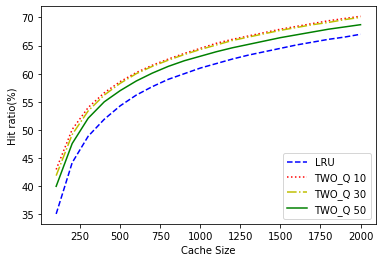

In [47]:
#data4
df_hitRatio.plot(style=['--',':','-.','-'],color=['b','r','y','g'])
plt.xlabel("Cache Size")
plt.ylabel("Hit ratio(%)")